In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from pathlib import Path
prev_lesson_output = Path(r'../04 - 20191113/data/map_data.geojson')

# Let's Continue Mapping!
We are going to continue on last lesson's map and customise it a bit more

In [2]:
df = gpd.read_file(prev_lesson_output)
df.head()

,Province,LocalAuth,UC implem,UC_date_number,geometry
0,England,Hartlepool,Mar-15,1.425168e+18,"MULTIPOLYGON (((-1.27025 54.72717, -1.27251 54..."
1,England,Middlesbrough,Nov-15,1.446336e+18,"MULTIPOLYGON (((-1.23003 54.58411, -1.23432 54..."
2,England,Redcar and Cleveland,Oct-15,1.443658e+18,"MULTIPOLYGON (((-1.13749 54.64572, -1.13758 54..."
3,England,Stockton-on-Tees,Sep-15,1.441066e+18,"MULTIPOLYGON (((-1.31776 54.64525, -1.31871 54..."
4,England,"Kingston upon Hull, City of",May-15,1.430438e+18,"MULTIPOLYGON (((-0.31613 53.81327, -0.32430 53..."


In [3]:
df['date'] = df['UC_date_number'].apply(pd.Timestamp)

In [42]:
df.shape

(380, 6)

In [30]:
x= df['date'].iloc[0]

In [39]:
df['LocalAuth'].str.upper()

0                        HARTLEPOOL
1                     MIDDLESBROUGH
2              REDCAR AND CLEVELAND
3                  STOCKTON-ON-TEES
4       KINGSTON UPON HULL, CITY OF
5          EAST RIDING OF YORKSHIRE
6                        DARLINGTON
7                            HALTON
8                   SOUTHEND-ON-SEA
9                        WARRINGTON
10            BLACKBURN WITH DARWEN
11                        BLACKPOOL
12          NORTH EAST LINCOLNSHIRE
13                             YORK
14                            DERBY
15               NORTH LINCOLNSHIRE
16                        LEICESTER
17                          RUTLAND
18                       NOTTINGHAM
19         HEREFORDSHIRE, COUNTY OF
20               TELFORD AND WREKIN
21                   STOKE-ON-TRENT
22     BATH AND NORTH EAST SOMERSET
23                           SLOUGH
24                 BRISTOL, CITY OF
25                        BRENTWOOD
26                   NORTH SOMERSET
27                        WO

Let's choose 4 colormaps from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [6]:
year_colormap = {
    2013: 'Greens',
    2014: 'Blues',
    2015: 'Reds', 
    2016: 'Greys',
}

let's create our own colormap using months of years as shades

In [7]:
colors = []
for year, colormap_name in year_colormap.items():
    for month in range(1, 12+1):
        cmap = plt.get_cmap(colormap_name)
        color = cmap(month/12)
        colors.append(color)

our_cmap = ListedColormap(colors)

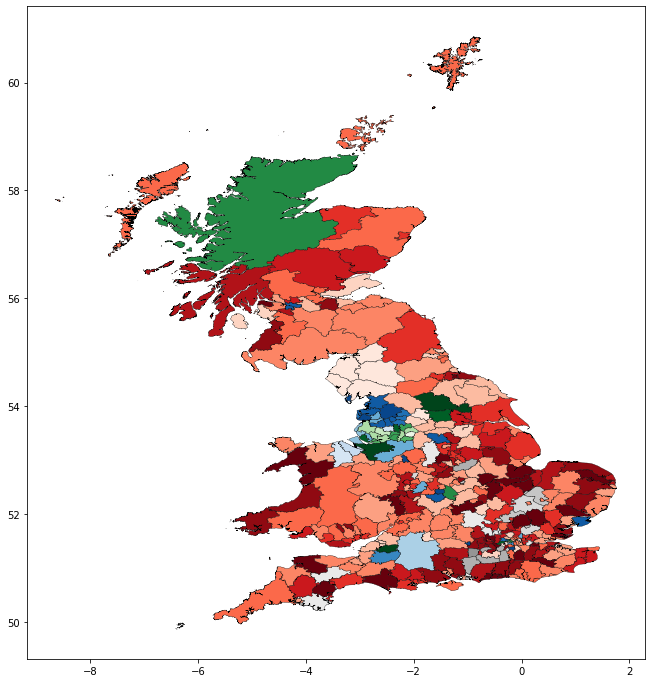

In [8]:
ax = df.plot(
    column='UC_date_number', 
    linewidth=0.3, 
    edgecolor='black',
    figsize=(18, 12),
    cmap=our_cmap
)

In [9]:
df[df['LocalAuth'] == 'Highland']

,Province,LocalAuth,UC implem,UC_date_number,geometry,date
333,Scotland,Highland,Dec-13,1.385856e+18,"MULTIPOLYGON (((-3.37341 58.67141, -3.37571 58...",2013-12-01


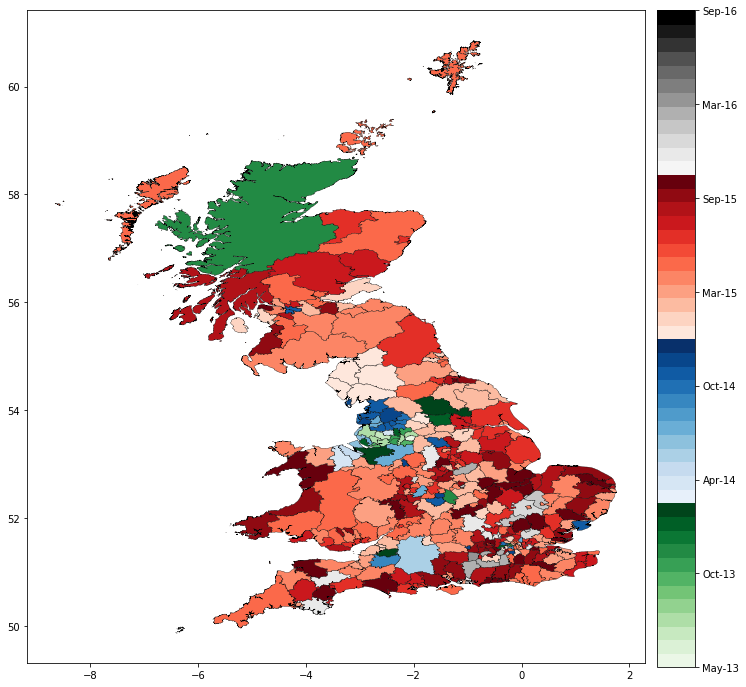

In [10]:
vmin = df['UC_date_number'].min()
vmax = df['UC_date_number'].max()
cbar_ticks_locations = pd.np.linspace(vmin, vmax, 8)
cbar_ticks_labels = [pd.Timestamp(i).strftime('%b-%y') for i in cbar_ticks_locations]

cbar = ax.figure.colorbar(
    plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=our_cmap), 
    cax=ax.figure.add_axes([0.76, 0.12, 0.03, 0.76]),  #[left, bottom, width, height] as fractions of figure width and height.
    ticks=cbar_ticks_locations
)
cbar.ax.set_yticklabels(cbar_ticks_labels)

ax.figure  # showing

### Save map as image

In [11]:
# save as image
ax.figure.savefig('static_map_custom_cmap.png', dpi=300, bbox_inches='tight')  # dpi is to increase the resolution of the image (default 200)